In [1]:
# example.ipynb
# Authors: Stephan Meighen-Berger
# Example how to use ITM

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("../")
from inthemoment import ITM, config

In [3]:
# Some settings
config['general']["random state seed"] = 44

In [4]:
itm = ITM()

Defining the sample
Setting the model pdf


In [5]:
# Generating the sample
itm.generate()

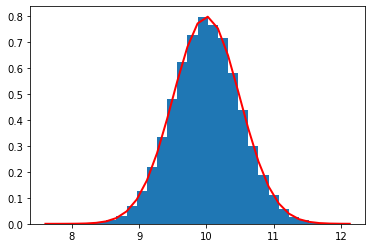

In [6]:
count, bins, ignored = plt.hist(itm.sample, 30, density=True)
plt.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r')
plt.show()

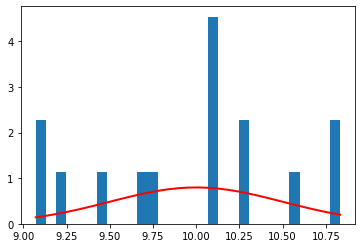

In [7]:
# The subset
count, bins, ignored = plt.hist(itm.subset, 30, density=True)
plt.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r')
plt.show()

In [8]:
 # Fitting
fit_res = itm.fit()

The subset has the following parameters
mu_subset= 9.968719247728488  sig_subset= 0.3051196914559078
Running the first level fit
mu_GMM1= 9.968719248928782  sig_GMM1= 0.5523763535237269
Re-Running the fit with improved errors
mu_GMM2= 9.968719248928767  sig_GMM2= 0.552376403510095
GMM took 6.199934e-01 seconds
Running scipy to compare
Norm fit took 0.000000e+00 seconds
mu_scipy= 9.968719247728488  sig_GMM2= 0.5523764037826994


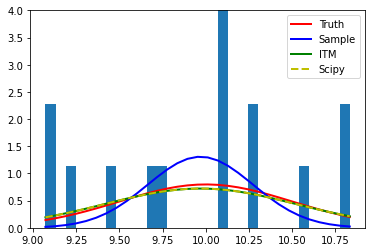

In [9]:
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(itm.subset, 30, density=True)
ax.plot(bins, itm._sample_pdf(bins, config["sample"]["pdf"]["mean"], config["sample"]["pdf"]["sd"]),
         linewidth=2, color='r', label='Truth')
ax.plot(bins, itm._pdf(bins, *fit_res[0]), label="Sample",
         linewidth=2, color='b')
ax.plot(bins, itm._pdf(bins, *fit_res[2]), label='ITM',
         linewidth=2, color='g')
ax.plot(bins, itm._pdf(bins, *fit_res[3]), label='Scipy',
         linewidth=2, color='y', ls='--')
ax.legend()
ax.set_ylim(0., 4)
plt.show()
fig.savefig("fit_res.png", facecolor='white', dpi=500)

In [10]:
# Example for the rebinning
count, bins = np.histogram(itm.sample, np.linspace(5., 15., 20), density=False)
old_grid = (bins[1:] + bins[:-1]) / 2.
new_grid_edges = np.linspace(5., 15., 40)

In [11]:
new_counts, new_grid, new_widths, new_edges = itm.rebin(
    count, old_grid, new_grid_edges,
    binning_scheme="Lin", negatives=True
)

[[ 0.25641026  0.25641026  0.25641026]
 [ 1.84089415  1.90664037  1.97238659]
 [13.21667594 14.17758222 15.17220452]]
9
[[ 0.25641026  0.25641026  0.25641026]
 [ 1.97238659  2.03813281  2.10387903]
 [15.17220452 16.20054283 17.26259714]]
11
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.10387903  2.16962525  2.23537147]
 [17.26259714 18.35836747 19.48785381]]
13
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.23537147  2.30111769  2.36686391]
 [19.48785381 20.65105615 21.84797451]]
15
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.36686391  2.43261012  2.49835634]
 [21.84797451 23.07860888 24.34295925]]
17
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.49835634  2.56410256  2.62984878]
 [24.34295925 25.64102564 26.97280804]]
19
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.62984878  2.695595    2.76134122]
 [26.97280804 28.33830644 29.73752086]]
21
[[ 0.25641026  0.25641026  0.25641026]
 [ 2.76134122  2.82708744  2.89283366]
 [29.73752086 31.17045129 32.63709773]]
23
[[ 0.25641026  0.25641026  0.2564

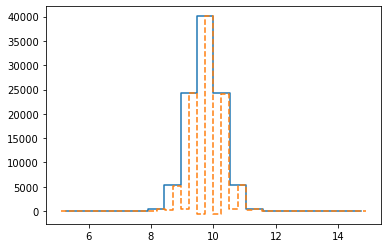

In [12]:
plt.step(old_grid, count)
plt.step(new_grid, new_counts, ls='--')

In [13]:
old_grid_edges = np.linspace(80., 120., 100)
old_grid = (old_grid_edges[1:] + old_grid_edges[:-1]) / 2.
v = np.random.normal(size=10000) + 100
count, bins = np.histogram(v, bins=old_grid_edges)

[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.93328451e+01 1.93732482e+01 1.94136512e+01]
 [1.85945053e+03 1.86723065e+03 1.87502701e+03]]
81
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.94136512e+01 1.94540542e+01 1.94944572e+01]
 [1.87502701e+03 1.88283962e+03 1.89066846e+03]]
83
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.94944572e+01 1.95348602e+01 1.95752633e+01]
 [1.89066846e+03 1.89851355e+03 1.90637488e+03]]
85
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.95752633e+01 1.96156663e+01 1.96560693e+01]
 [1.90637488e+03 1.91425246e+03 1.92214627e+03]]
87
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.96560693e+01 1.96964723e+01 1.97368753e+01]
 [1.92214627e+03 1.93005633e+03 1.93798263e+03]]
89
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.97368753e+01 1.97772784e+01 1.98176814e+01]
 [1.93798263e+03 1.94592518e+03 1.95388396e+03]]
91
[[2.01005025e-01 2.01005025e-01 2.01005025e-01]
 [1.98176814e+01 1.98580844e+01 1.98984874e+01]
 [1.95388396e+03

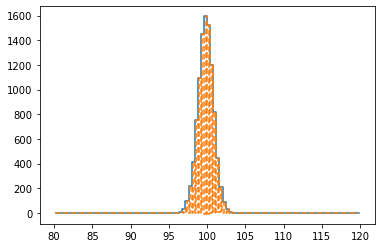

In [14]:
old_grid_edges = np.linspace(80., 120., 100)
old_grid = (old_grid_edges[1:] + old_grid_edges[:-1]) / 2.
v = np.random.normal(size=10000) + 100
count, bins = np.histogram(v, bins=old_grid_edges)
new_grid_edges = np.linspace(80., 120., 200)
new_counts, new_grid, new_widths, new_edges = itm.rebin(
    count, old_grid, new_grid_edges,
    binning_scheme="Lin", negatives=True
)
plt.step(old_grid, count)
plt.step(new_grid, new_counts, ls='--')

(95.0, 105.0)

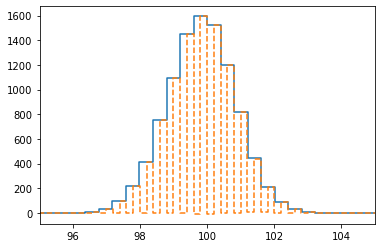

In [15]:
plt.step(old_grid, count)
plt.step(new_grid, new_counts, ls='--')
plt.xlim(95., 105)